In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.patheffects as path_effects

In [2]:
ecommerce = pd.read_csv('ecommerce_techshop_clientes.csv')

In [3]:
ecommerce.head(10)

,user_id,nombre_cliente,session_id,fecha,evento,device,country,time_on_site,product_id,product_category,producto_nombre,purchase_value
0,746fb5c6-52b7-4999-af06-0bc493046ae2,Maite Neira Diéguez,34c3c58f-0e95-4ac7-baf4-0afac30c92a6,2025-02-26 15:20:45,add_to_cart,mobile,Dinamarca,311,9166212e-5b14-468f-9129-52b87225ef6d,Laptops,Dell XPS,NaN
1,53f8e2b9-0f28-40f4-8d66-f9a8d9ae84c0,Hilario Iniesta Moliner,244e2474-5c39-4ef2-812e-4b03bb2e4d45,2025-01-29 21:52:37,landing_page,mobile,Serbia,588,NaN,NaN,NaN,NaN
2,babcd342-ee9d-45a6-996d-bdaf11f4ecd3,Eliana Lladó-Zamora,90458525-a99c-4a33-8eb2-228120fa69cf,2025-02-24 16:27:18,landing_page,desktop,Granada,62,NaN,NaN,NaN,NaN
3,7d4aac3e-174e-4eb4-84e6-441c7d80561d,Nacio Gómez Carreño,aedf0598-ceb7-4600-9714-ff01163cfd39,2025-05-22 00:56:52,landing_page,mobile,Bulgaria,268,NaN,NaN,NaN,NaN
4,96f30f4a-09cd-4b53-8dfa-1e8d4d9dc7aa,Remedios Franco,4f56195f-60cc-4019-96b3-824005fa8b9e,2025-06-03 07:03:41,product_view,mobile,Camboya,233,36762da1-140f-44a3-93d8-c6e94f394e07,Gaming,Nintendo Switch,NaN
5,fad730b0-5526-4605-9386-42ffa9e9be11,Felisa Almeida Moreno,b77a21b0-5532-46b4-8a8a-fb3a9f2487d8,2025-06-12 03:15:14,add_to_cart,desktop,Noruega,255,2edacd22-6345-4c91-a246-040041ab2679,Audio,Bose QuietComfort,NaN
6,3da6cc9e-3fe6-4ee0-aed4-7266a75f49be,Remigio Villar-Blasco,fb89f031-1545-4a06-a99d-b1a9d23cb93a,2025-04-25 01:57:29,landing_page,mobile,Samoa,193,NaN,NaN,NaN,NaN
7,dffe9bbd-d4ce-4834-a89a-8ae0d492cfbf,Flora Ríos Crespo,e18f2899-fc4e-4520-a43b-b69dad504af1,2025-01-18 00:09:26,add_to_cart,desktop,Nueva Zelandia,314,bb9e1312-f20c-46e9-8c06-19ffcecd4c6b,Laptops,Dell XPS,NaN
8,c67589f1-b8af-46f6-a973-b52373b36ea1,Teodosio Andrade,8a8d231d-311f-4d36-a6fa-4e844f73d97f,2024-09-25 20:43:07,purchase,desktop,Guyana,134,0cf4fb16-821b-45ae-beaf-55ed7e63c7dd,Smartphones,Google Pixel 8,238.6
9,550e33d9-2c5a-4ab4-8e6b-678e06e2372a,Manu del Carnero,a291b524-b25d-437a-9ba3-6a70940c3d70,2025-09-04 22:10:49,checkout,tablet,Filipinas,300,NaN,NaN,NaN,NaN


In [ ]:
  #Columnas y descripción:
# - user_id: Identificador único del usuario (UUID)
#    - nombre_cliente: Nombre completo del cliente (consistente por user_id)
 #   - session_id: ID único de cada sesión de navegación (UUID)
  #  - fecha: Fecha y hora del evento (datetime)
   # - evento: Tipo de interacción (landing_page, product_view, add_to_cart, checkout, purchase)
   # - device: Dispositivo utilizado (mobile, desktop, tablet)
   # - country: País del usuario
   # - time_on_site: Tiempo en segundos en la sesión
    #- product_id: ID único del producto (UUID, solo para eventos de producto)
    #- product_category: Categoría del producto
    #- producto_nombre: Nombre del producto
    #- purchase_value: Valor de la compra en USD (solo para eventos de purchase)

In [ ]:
#¿Cuál es la tasa de conversión global de visitas a compras?

# Tasa de Conversion por pais y grafica del top 10 de paises con mejor y peor tasa de conversion

#¿En qué etapa del funnel se pierden más usuarios?

#¿Qué dispositivo tiene mejor tasa de conversión?

#¿Qué país tiene el CAC más bajo?

#¿Cuál es el tiempo promedio entre add_to_cart y purchase?

#¿Los usuarios de España vs México se comportan diferente?

#¿Qué país tiene mayor average order value?

#¿Existe estacionalidad en las compras por país?

#¿Los usuarios de mobile abandonan más el carrito?

#¿Qué dispositivo genera más ingresos?

#¿Cuáles son los top 10 clientes por valor gastado?

#¿Hay clientes recurrentes o la mayoría son one-time?

In [4]:
#Tasa de conversion
usuariosQueVisitan = ecommerce[ecommerce['evento'] == 'landing_page']['user_id'].nunique()
usuariosQueCompran = ecommerce[ecommerce['evento'] == 'purchase']['user_id'].nunique()
tasaConversion = (usuariosQueCompran/usuariosQueVisitan)*100
print(f"Tasa de conversion en general: {tasaConversion:.3f}%")

Tasa de conversion en general: 14.454%


In [15]:
#funcion para calcular la tasa de conversion por pais 
def tasaConversionPais(ecommerce):
    resultados = []
    for pais in ecommerce['country'].unique():
        ecommercePais = ecommerce[ecommerce['country'] == pais]
        visitas = ecommercePais[ecommercePais['evento'] == 'landing_page']['user_id'].nunique()
        compras = ecommercePais[ecommercePais['evento'] == 'purchase']['user_id'].nunique()
        if visitas > 0:
            tasa = (compras / visitas) * 100
        else:
            tasa = 0
        resultados.append({
            'pais': pais,
            'tasa_conversion': round(tasa, 2)
        })
    return pd.DataFrame(resultados).sort_values('tasa_conversion', ascending=False)

# Usar la función
tasa_paises = tasaConversionPais(ecommerce)
print("Top de pais con tasa de conversion mayor:")
print(tasa_paises.head(22))
print("\n\nPaises con tasa de conversion menor: \n")
menorTasaPais = tasa_paises.nsmallest(50, 'tasa_conversion')
print(menorTasaPais)

Top de pais con tasa de conversion mayor:
                                                pais  tasa_conversion
38                                        San Marino            27.03
158                                    Guinea Bissau            25.37
51                                           Etiopía            25.32
45                                      Países Bajos            23.81
10                                         Guatemala            23.75
160                  República Democrática del Congo            23.38
71                                           Andorra            23.08
124                                          Lesotho            23.08
130                            Santo Tomé y Príncipe            22.37
46   Reino Unido de Gran Bretaña e Irlanda del Norte            22.09
146                                          Comoras            21.92
140                                            Palau            21.35
153                                           Ug

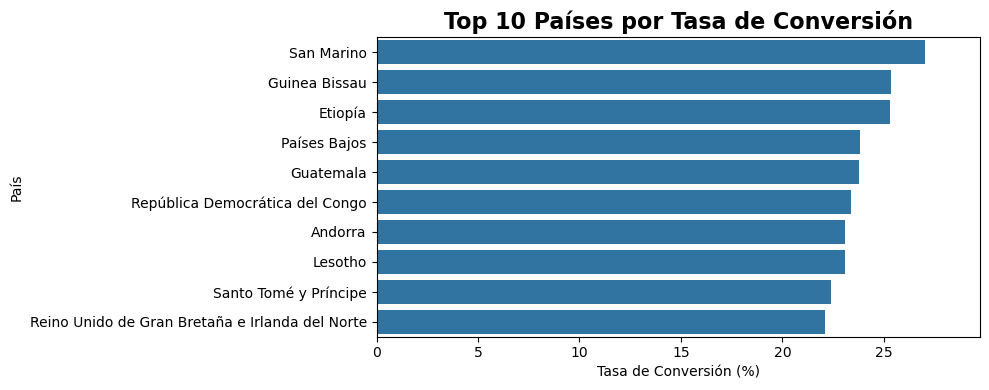

In [6]:
top_10 = tasa_paises.head(10)
plt.figure(figsize=(10, 4))
sns.barplot(data=top_10, x='tasa_conversion', y='pais')
plt.title('Top 10 Países por Tasa de Conversión', fontsize=16, fontweight='bold')
plt.xlabel('Tasa de Conversión (%)')
plt.ylabel('País')
plt.xlim(0, top_10['tasa_conversion'].max() * 1.1)
plt.tight_layout()
plt.show()

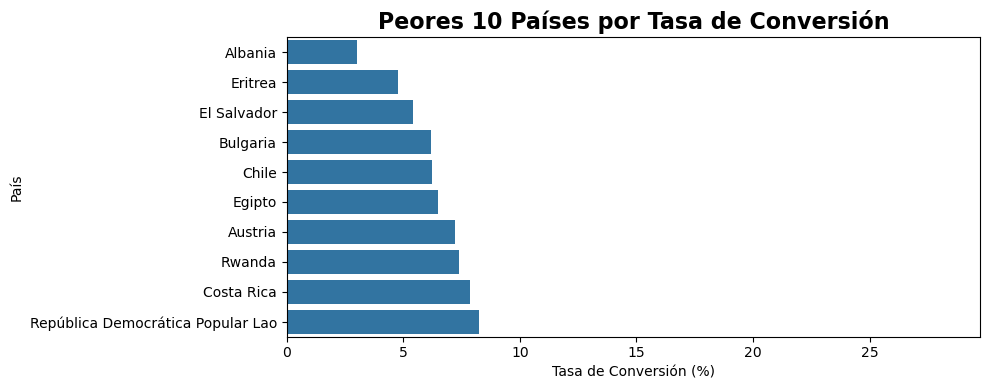

In [7]:
peorTasa = menorTasaPais.head(10)
plt.figure(figsize=(10, 4))
sns.barplot(data=peorTasa, x='tasa_conversion', y='pais')
plt.title('Peores 10 Países por Tasa de Conversión', fontsize=16, fontweight='bold')
plt.xlabel('Tasa de Conversión (%)')
plt.ylabel('País')
plt.xlim(0, top_10['tasa_conversion'].max() * 1.1)
plt.tight_layout()
plt.show()

CONTANDO USUARIOS POR ETAPA:
landing_page: 17559 usuarios
product_view: 12400 usuarios
add_to_cart: 9832 usuarios
checkout: 7671 usuarios
purchase: 2538 usuarios


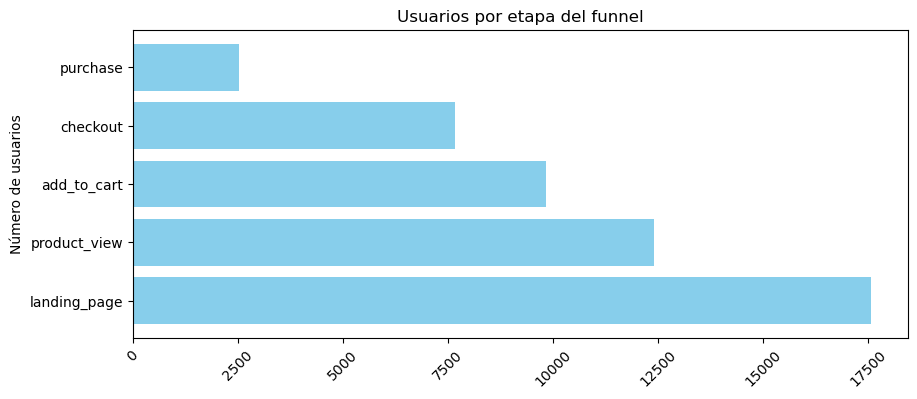


Análisis rápido:
De 17559 que entraron, solo 2538 compraron
Tasa de conversión: 14.5%


In [18]:
#¿En qué etapa del funnel se pierden más usuarios?
eventos = ['landing_page', 'product_view', 'add_to_cart', 'checkout', 'purchase']
usuarios = []

print("CONTANDO USUARIOS POR ETAPA:")
for evento in eventos:
    count = ecommerce[ecommerce['evento'] == evento]['user_id'].nunique()
    usuarios.append(count)
    print(f"{evento}: {count} usuarios")

# Gráfica simple
plt.figure(figsize=(10, 4))
plt.barh(eventos, usuarios, color='skyblue')
plt.title('Usuarios por etapa del funnel')
plt.ylabel('Número de usuarios')
plt.xticks(rotation=45)
plt.show()

print(f"\nAnálisis rápido:")
print(f"De {usuarios[0]} que entraron, solo {usuarios[-1]} compraron")
print(f"Tasa de conversión: {(usuarios[-1]/usuarios[0])*100:.1f}%")

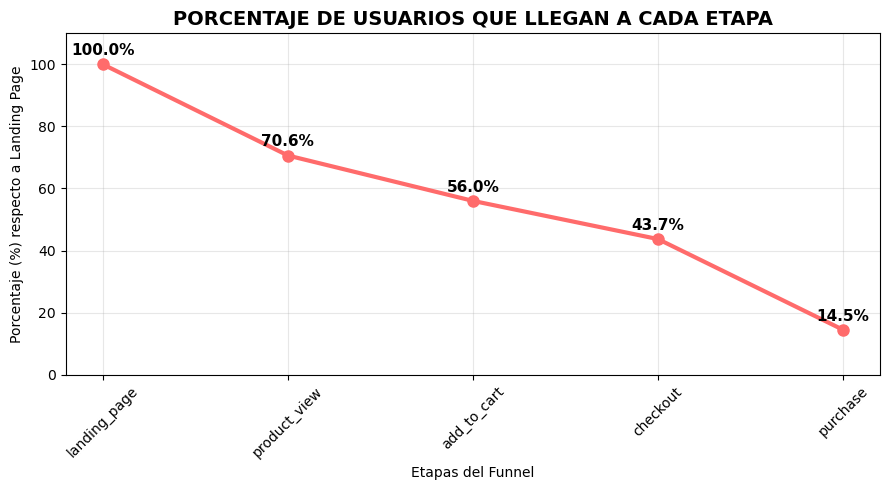

In [14]:
# Calcular porcentajes respecto a la primera etapa
porcentajes = [(usuarios[i] / usuarios[0]) * 100 for i in range(len(usuarios))]

plt.figure(figsize=(9, 5))
plt.plot(eventos, porcentajes, marker='o', linewidth=3, markersize=8, color='#FF6B6B')

# Añadir puntos de datos
for i, (etapa, porcentaje) in enumerate(zip(eventos, porcentajes)):
    plt.text(i, porcentaje + 2, f'{porcentaje:.1f}%', ha='center', va='bottom', 
             fontweight='bold', fontsize=11)

plt.title('PORCENTAJE DE USUARIOS QUE LLEGAN A CADA ETAPA', fontsize=14, fontweight='bold')
plt.ylabel('Porcentaje (%) respecto a Landing Page')
plt.xlabel('Etapas del Funnel')
plt.ylim(0, 110)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()